# (E-commerce) Приоритезация гипотез и анализ результатов АВ теста

## Задачи проекта

Для крупного интернет-магазина необходимо:
- осуществить приоретизацию гипотез по вопросу увеличения выручки;
- провести анализ результатов А/В теста на базе куммулятивных показателей

## Блок с библиотеками необходимыми для проекта

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

## Часть I. Приоритезация гипотез по увеличению выручки

### Исходная информация

У нас имеются 9 гипотез, нацеленных на увеличение выручки интернет-магазина.

**Задача**
- Провести приоретизацию имеющихся гипотез с помощью фреймворка ICE. 
- Провести приоретизацию имеющихся гипотез с помощью фреймворка RICE. 
- Сравнить результаты приоретизаций и написать выводы по сравнению.

**Датасет**

Файл `/datasets/hypothesis.csv`
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

### Информация о гипотезах

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', 150)
data.columns = data.columns.str.lower()
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE

In [3]:

data['ICE'] = data['impact'] * data['confidence'] / data['efforts']

display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(1))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


**Промежуточный вывод** При осуществлении приоретизации гипотез фреймворком ICE  наиболее приоритетеными были определены гипотезы 8, 0, 7, 6 и 2. К менее приоритетным были отнесены гипотезы 1, 5, 3, 4.

### Фреймворк RICE

In [4]:

data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Промежуточный вывод** При осуществлении приоретизации гипотез фреймворком RICE  наиболее приоритетеными были определены те же гипотезы, что и по фреймворку ICE, но в другом порядке 7, 2, 0, 6 и 8. Тот же эффект можно наблюдать по второй группе гипотез, при этом гипотеза 4 оказалась наименее приоритетной по обоим расчетам.

Дополнительно выведем на экран перечень гипотез с результатами расчета по обоим фреймворкам

In [5]:
display(data[['hypothesis', 'ICE', 'RICE']].sort_values(by='ICE', ascending=False).round(1))

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


### Сравнительные выводы

- При осуществлении приоретизации фреймворком ICE первое место занимает гипотеза "Запустить акцию, дающую скидку на товар в день рождения" при этом при приоретизации RICE эта гипотеза занимает только 5 место, что объясняется тем, что данная гипотеза имеет объяснимые ограничения по охвату, поскольку скидку по этой акции потребитель может получить лишь в ограниченный период времени, до которого он может и не "дожить".
- На втором месте по ICE и третьем по RICE гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". В целом, это показывает, что добавление 2 новых каналов привлечения новых пользователей стабильно эффективный инструмент, ограничениями которого выступают не 100% гарантированность ожидаемого результата и увеличение затратной части бизнеса.
- На третьем месте по ICE и первом месте по RICE гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 100% охват по данной гипотизе (reach) и высокий показатель влияния на юзабельность (impact), говорит о том, что реализация данной гипотезы затронет всех пользователей продукта и это может повлиять значительно на их удовлетворенность пользования, с другой стороны нельязя утверждать, что это приведет к гарантированно положительному эффекту.
- одинаковое четвертое место по обоим фреймворкам занимает гипотеза "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".
- Пятое место по ICE и второе место по RICE занимает гипотеза "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". Такая разница объясняется высокой степенью уверенности в правильности определения критериев (confidence) и невысокой степенью трудо- и ресурсозатратностью.
- Остальные критерии имеют низие показатели приоритетности по обоим фреймворкам либо в связи с высокими трудо- и ресурсозатратми (гипотезы 1 и 3), либо с в целом низкими значениями по всем переменным скоррингов(гипотезы 4 и 5).
- Выбор фреймворка к имеющимся гипотезам зависит от конкретной текущей ситуации в компании на чем делать акцент: развитии бизнеса или развитии продукта.

## Часть II. Анализ результатов А/В теста

### Исходная информация

**Задачи**:
- Построить график кумулятивной выручки по группам, сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам, сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A, сделатье выводы и предположения.
- Построить график кумулятивной конверсии по группам, сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A, сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям, сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя, выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов, сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов, выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным, сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным, сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, сделать выводы и предположения.
- Проанализировать и описать результаты теста, обосновав принятие одного из следующих решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Датасеты**

Файл `/datasets/orders.csv` 

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


### Результаты А/В теста


Посмотрим имеющиеся у нас данные

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
# Преобразуем столбцы с датами в datetime

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


#### Посмотрим файл с покупками

Узнаем количество транзакций и количество уникальных пользователей по группам

In [12]:
(orders.pivot_table(index='group', values='visitorId', aggfunc={'visitorId' : ['count', 'nunique']})).reset_index()

,group,count,nunique
0,A,557,503
1,B,640,586


**Вывод** В группе В покупателей больше на 7,5%, это вызывает вопросы к чистоте проведения А/В теста

Проверим, есть ли у нас покупатели, которые бы учитывались и в группе А и в группе В.

In [13]:
dupl = orders['visitorId']
dubl_group = orders[dupl.isin(dupl[dupl.duplicated()])].sort_values('visitorId')
dubl_group[['visitorId', 'group']].drop_duplicates(keep='first')

,visitorId,group
71,8300375,B
703,8300375,A
1102,199603092,A
246,199603092,B
1013,232979603,A
...,...,...
1167,4186807279,A
187,4256040402,A
873,4256040402,B
682,4266935830,B


**Вывод** Покупки 76 покупателей были учтены и в группе А и в группе В, это ставит вопросы о чистоте проведения А/В теста.

In [14]:
display(f'Покупатели группы А совершали покупки с {orders[orders["group"] == "A"]["date"].min()} по {orders[orders["group"] == "A"]["date"].max()}')
display(f'Покупатели группы B совершали покупки с {orders[orders["group"] == "B"]["date"].min()} по {orders[orders["group"] == "B"]["date"].max()}')

'Покупатели группы А совершали покупки с 2019-08-01 00:00:00 по 2019-08-31 00:00:00'

'Покупатели группы B совершали покупки с 2019-08-01 00:00:00 по 2019-08-31 00:00:00'

**Вывод по подразделу** Изучение данных о покупках вызывает вопросы, поскольку группы различаются по количеству покупателей, кроме того покупки 76 покупателей учтены как в одной, так и в другой группе.

#### Посмотрим файл с визитами пользователей

In [15]:
(visitors.pivot_table(index='group', values='visitors', aggfunc={'visitors' : 'sum'})).reset_index()

,group,visitors
0,A,18736
1,B,18916


In [16]:
display(f'Визиты покупателей группы А осуществлялись с {visitors[visitors["group"] == "A"]["date"].min()} по {visitors[visitors["group"] == "A"]["date"].max()}')
display(f'Визиты покупателей группы B осуществлялись с {visitors[visitors["group"] == "B"]["date"].min()} по {visitors[visitors["group"] == "B"]["date"].max()}')

'Визиты покупателей группы А осуществлялись с 2019-08-01 00:00:00 по 2019-08-31 00:00:00'

'Визиты покупателей группы B осуществлялись с 2019-08-01 00:00:00 по 2019-08-31 00:00:00'

**Выводы по разделу:** 
- Как визиты, так и покупки в обеих группах осуществлялись в период с 01.08.2019 по 31.08.2019
- В группе В покупателей больше на 7,5%, это вызывает вопросы к чистоте проведения А/В теста
- Покупки 76 покупателей были учтены и в группе А и в группе В, это ставит вопросы о чистоте проведения А/В теста.

### Кумулятивная выручка по группам

In [17]:
#Соберем куммулятивные данные на каждый день проведения теста с разбивкой по исследуемым группам

datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']))

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

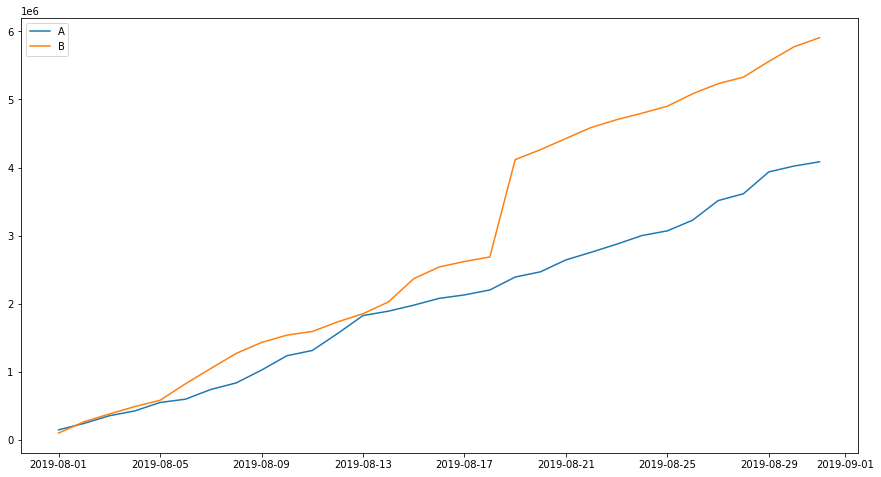

In [18]:
#Построим графики куммулятивной выручки по исследуемым группам

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(15, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.show()

**Выводы и предположения** Динамика изменения кумулятивной выручки до 13.08.2019 в целом у обоих групп была схожей, с небольшим преимуществом группы B. 13.08.2019 куммулятивная выручка групп сравнялась, после чего выручка группы B стабильно была выше, более того 19.08.2019 был резкий скачок куммулятивной выручки группы B, что вероятно может объясняться либо разовой покупкой высокой стоимости, либо аномальным увеличением количества покупок в этой группе в этот день. После этого графики практически параллельны, то есть выручка в оставшийся период росла в обеих группах одинаково.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

    
**#ок**

Да, график верно построен и описан
    
</div>

### Кумулятивный средний чек по группам

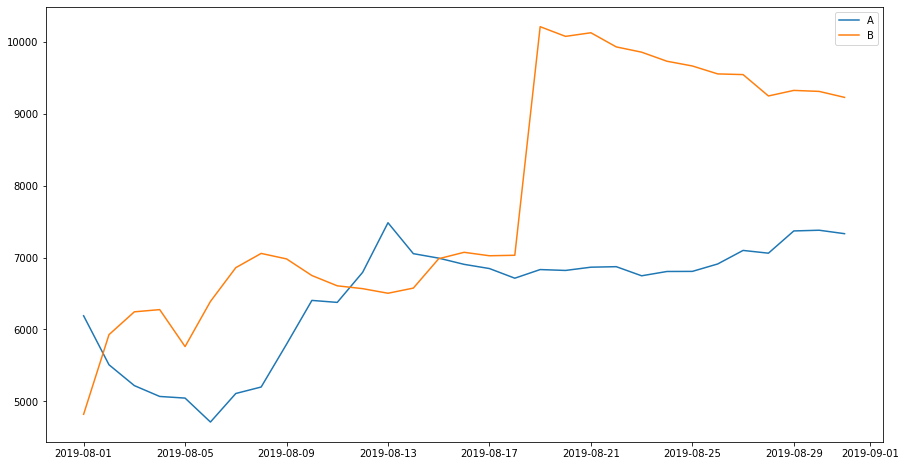

In [19]:
#Построим графики куммулятивного среднего чека по исследуемым группам

plt.figure(figsize=(15, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

**Выводы и предположения** Динамика изменений куммулятивных средних чеков по группам более переменчива в исследуемом периоде, так 01.08.2019 и с 12.08.2019 по 14.08.2019 кумулятивный средний чек группы А был выше кумулятивного чека группы B, при этом между этими датами чек группы B был выше, после 15.08.2019 средний чек группы B был только выше. Также 19.08.2019 мы видим резкий скачок куммулятивного среднего чека группы В, после чего разница между кумулятивными срдними чеками групп стал незначительно сближаться, но так и не выровнялся в исследуемом периоде.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

    
**#ок**

+
    
</div>

### Относительное изменение кумулятивного среднего чека группы B к группе A

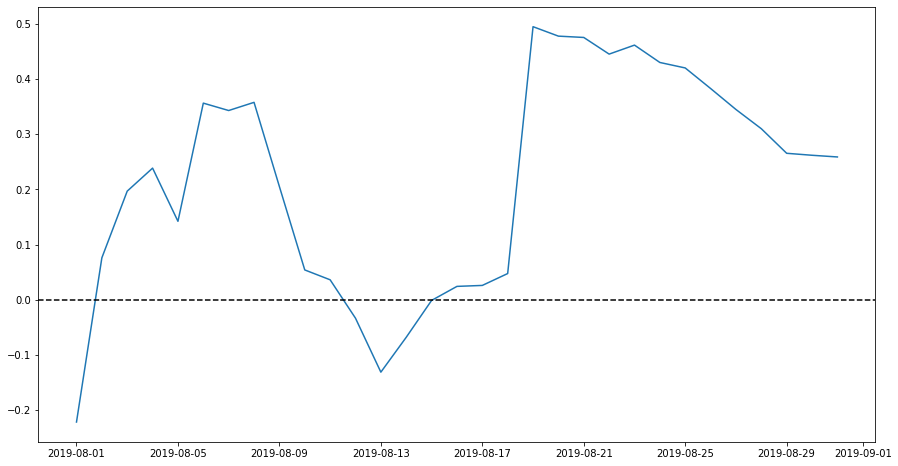

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

**Выводы и предположения** На графике мы видим своего рода синусоиду, при которой средний чек группы В планомерно поднимался и снижался (13.08.2019) и резкий скачок 19.08.2019, вероятно в этот день точно что то произошло.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

    
**#ок**

+
    
</div>

### Kумулятивная конверсия по группам

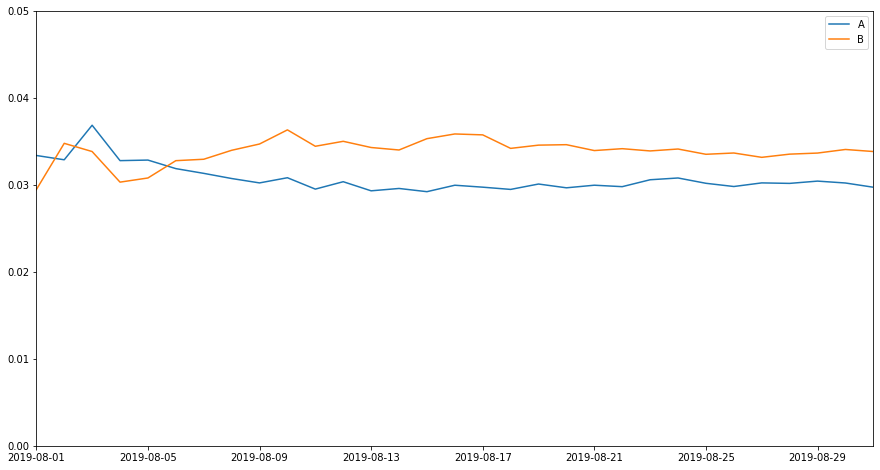

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.show()

**Выводы и предположения** Первую неделю исследуемого периода графики колебались, но после этого кумулятивная конверсия группы В вырвалась вперед и более не снижалась.

### Относительное изменение кумулятивной конверсии группы B к группе A

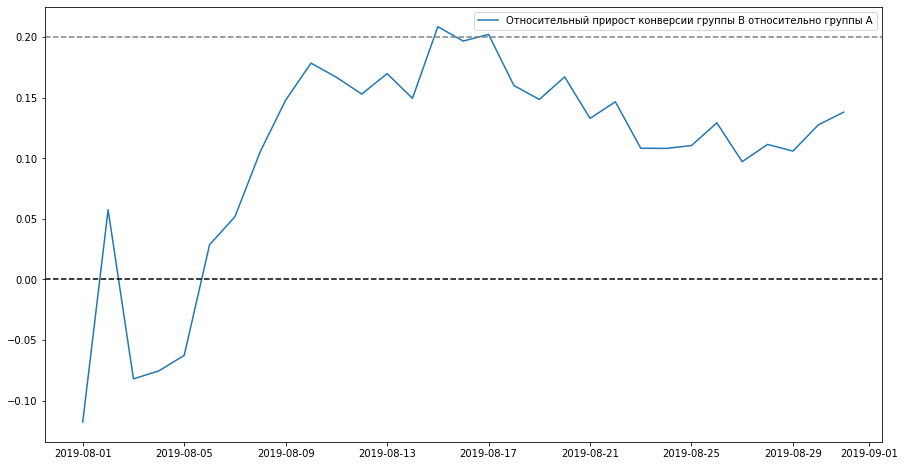

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

**Выводы и предположения** В первые 5 дней теста относительная куммулятивная конверсия колебалась, но после этого группа B показывала более высокий результат, то немного опускаясь, то немного поднимаясь.

### Количества заказов по пользователям и определение границы аномальности данных

#### Количество заказов по пользователям

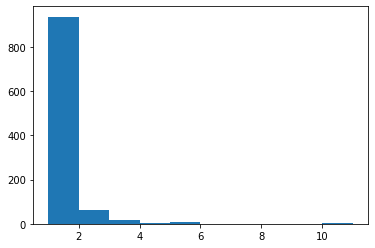

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['user', 'orders']


plt.hist(ordersByUsers['orders']) 
plt.show()

#### Определение границ аномальности данных

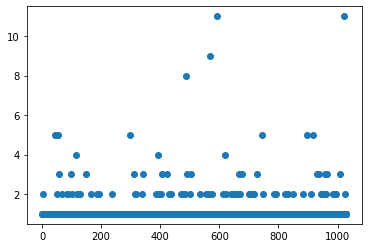

In [24]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Выводы и предположения** Как видно выше 95% пользователей осуществляли не более 2 заказов, при этом только 1% делали 4 и более заказа. 

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

    
**#ок**

Хорошо, правильный расчет
</div>

### Стоимость заказов по пользователям и определение границ аномальноти данных

#### Стоимость заказов по пользователям

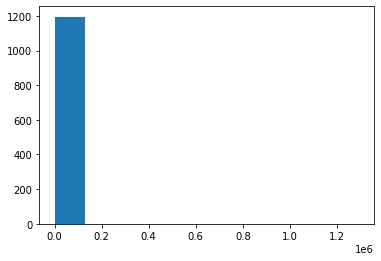

In [26]:
plt.hist(orders['revenue']) 
plt.show()

#### Определение границ аномальности данных

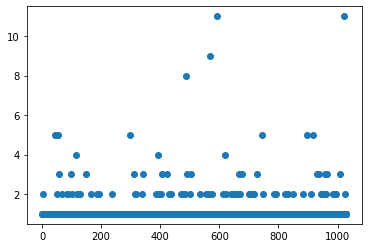

In [27]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Выводы и предположения** 95% покупок не превышает 28 тысяч, менее 1% составляют покупки стоимостью выше 58 тысяч.

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

- Определим порогом статистической значимости: α = 0,05
- Нулевая гипотеза - Различий в конверсии между группами нет
- Альтернативная гипотеза - Конверсия двух групп различается

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = (
            pd.concat([ordersByUsersA['orders'],
            pd.Series(0, index=np.arange(data['visitorsPerDateA']
            .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
)
sampleB = (
            pd.concat([ordersByUsersB['orders'],
            pd.Series(0, index=np.arange(data['visitorsPerDateB']
            .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
)
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


**Выводы и предположения** По расчетам p-value = 0,017, что меньше 0,05, значит у нас есть основания отвергнуть Нулевую гипотезу, поскольку различие между конверсиями двух групп по "сырым" данным статистически  значимы. При этом относительное различие между конверсиями двух груп по "сырым" данным составляет 13,8% в пользу группы B.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

- Определим порогом статистической значимости: α = 0,05
- Нулевая гипотеза - Различий в среднем чеке между группами нет
- Альтернативная гипотеза - Средний чек двух групп различается

In [30]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


**Выводы и предположения** А вот по среднему чеку ситуация отличается, поскольку p-value значительно больше 0,05 отвергать Нулевую гипотезу нельзя, то есть различия между средними чеками групп статистически незначимы. При этом относительная разница между группами составляет 25,9% в пользу группы B.

### Список пользователей с аномальным количеством заказов или аномальной ценой заказа

Для очистки "сырых" данных удалим покупателей, которые совершили количество покупок, составляющее менее 1% от количества покупок, которые совершали покупатели и покупателей, которые осуществили покупку стоимостью менее 1% от стоимости, которую оплачивали покупатили на одну покупку. 

In [31]:
normalOrders = ordersByUsers['orders'].quantile(.99)
normalRevenue = orders['revenue'].quantile(.99)


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > normalOrders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > normalOrders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > normalRevenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
15


**Выводы** по имеющимся данным мы получили список из 15 покупателей.

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

- Определим порогом статистической значимости: α = 0,05
- Нулевая гипотеза - Различий в конверсии между группами нет
- Альтернативная гипотеза - Конверсия двух групп различается

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


**Выводы и предположения** р-value конверсий по "очищенным" данным между группами составило 0,014, что меньше 0,05, значит у нас есть основания отвергнуть Нулевую гипотезу, поскольку различие между конверсиями двух групп по "очищенным" данным статистически значимы. При этом относительное различие между конверсиями двух груп по "очищенным" данным составляет 15,3% в пользу группы B. 

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

- Определим порогом статистической значимости: α = 0,05
- Нулевая гипотеза - Различий в среднем чеке между группами нет
- Альтернативная гипотеза - Средний чек двух групп различается

In [33]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.851
-0.006


**Выводы и предположения** p-value по "очищенным" данным еще больше увеличилось и составило 0,851, что значительно больше 0,05 и говорит о том, что средний чек у двух групп статистически практически одинаков. При этом после очистки данных относительная разница среднего чека уже составила 0,6% в пользу группы А.

### Анализ результатов теста и рекомендуемое решение

По результатам проведенного A/B теста можно сделать следующие выводы:
- В исследуемом периоде пользователи группа B более опередила группу А по конверсии.
- При этом средний чек у покупателей обеих групп практически идентичен.
- Рекомендуемое решение по A/B тесту - Остановить проведение теста, поскольку была нарушена чистота его проведения и его результаты не могут быть признаны корректными для принятия бизнес-решений. 